In [57]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [58]:
import pathlib
data_dir = pathlib.Path("./train/")
data_dir_val = pathlib.Path("./test/")

In [59]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

batch_size = 12
img_height = 180
img_width = 180

1156


In [60]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=1
)


Found 1156 files belonging to 9 classes.


In [61]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_val,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  seed=1
  )

Found 502 files belonging to 9 classes.


In [62]:
class_names = train_ds.class_names
print(class_names)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1111).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

['Ajwa', 'Galaxy', 'Medjool', 'Meneifi', 'NabtatAli', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']
0.0005808223 0.98046476


In [67]:
num_classes = len(class_names)
epochs = 15
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 45, 45, 64)       

In [64]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
97/97 [==============================] - 26s 254ms/step - loss: 1.8398 - accuracy: 0.3054 - val_loss: 2.1621 - val_accuracy: 0.4223
Epoch 2/15
97/97 [==============================] - 26s 269ms/step - loss: 0.9521 - accuracy: 0.6661 - val_loss: 0.7115 - val_accuracy: 0.7570
Epoch 3/15
97/97 [==============================] - 28s 284ms/step - loss: 0.6269 - accuracy: 0.7785 - val_loss: 0.5646 - val_accuracy: 0.7908
Epoch 4/15
97/97 [==============================] - 26s 265ms/step - loss: 0.5103 - accuracy: 0.8192 - val_loss: 0.6713 - val_accuracy: 0.7590
Epoch 5/15
97/97 [==============================] - 23s 241ms/step - loss: 0.4052 - accuracy: 0.8581 - val_loss: 0.5526 - val_accuracy: 0.7928
Epoch 6/15
97/97 [==============================] - 20s 205ms/step - loss: 0.4702 - accuracy: 0.8348 - val_loss: 0.4049 - val_accuracy: 0.8486
Epoch 7/15
97/97 [==============================] - 22s 230ms/step - loss: 0.3273 - accuracy: 0.8841 - val_loss: 0.3650 - val_accuracy: 0.8645

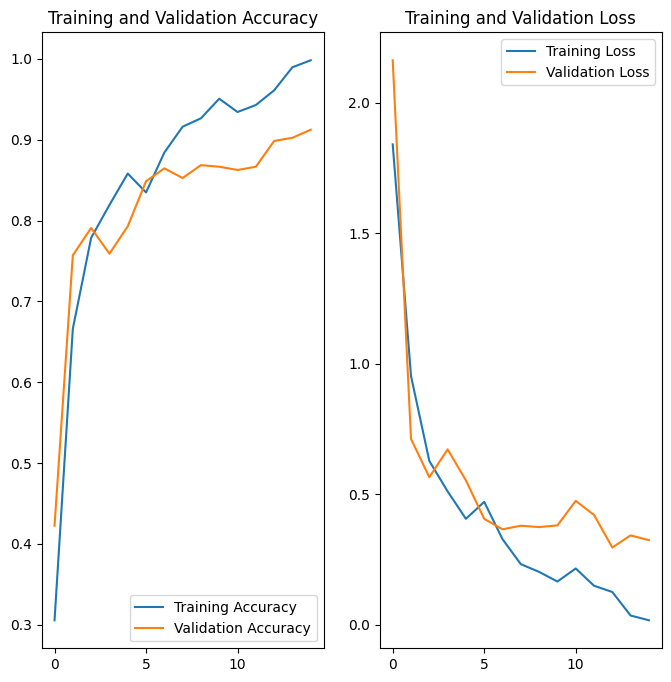

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [66]:
tf.math.confusion_matrix(
    labels_batch, tf.argmax(model.predict(image_batch), axis=1), num_classes=num_classes
)

1/1 [==============================] - 0s 170ms/step


<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0]])>